## Prime queery

In [1]:
import pandas as pd
from openai import OpenAI

# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija = df['darija_ar'].tolist()

eng = df['eng']
#eng = [verb.replace(" ", "_") for verb in eng]
client = OpenAI()

transl = []

for verb in darija:
    completion = client.chat.completions.create(
    model =  "gpt-3.5-turbo",
    messages = [
        {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
        {"role": "user", "content": "Translate the provided Moroccan Darija dialect verbs into English using word-by-word translation." + 
        "Please fulfill the following conditions when translating."+
        "The output must not be an infinitive verb. No explanations are needed in the output"+
        "Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 
        "Target audience: Computational linguists" 
         },
        {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
        {"role": "user", "content": f"{verb}"},
    ],
    temperature=0, # deterministic
   # max_tokens=1, # in case of a dot
    )
    transl.append(completion.choices[0].message.content)

print(transl)

['Eat', 'drink', 'Entered', 'Went out', 'Understood', 'Explanation', 'Reads', 'Reads', 'hear', 'Saw', 'smell', 'He entered', 'Measure', 'Went', 'Came', 'Went out', 'Went down', 'Year', 'Drown', 'Wore', 'I asked', 'Buy', 'He sold', 'He was coming', 'Wrote', 'Wiped', 'hit', 'You peace', 'He went', 'You are playing', 'Laughed', 'Anger', 'Brought', 'Was', 'He did', 'Go', 'Said', 'He has', 'Tightened', 'Think', 'With', 'Found', 'Gave', 'Worked', 'Call', 'I will.', 'Feel', 'Refuse', 'Put', 'We have.', 'Started', 'Lost', 'Found', 'liked', 'News', 'Help', 'Freed', 'Found', 'Secure', 'Try', 'Try', 'Proposed', 'You think', 'Went', 'Show', 'play', 'Run', 'Run', 'Reads', 'Started', 'He asked', 'Cut', 'Speak', 'Thankfulness', 'Change', 'Complete', 'You will be pleased.', 'We wished', 'Follows', 'Before', 'refused', 'Fall', 'I eat', 'Winning', 'Increased', 'Learned', 'We waited', 'He will open', 'Sold', 'Buy', 'Solve', 'We built', 'Choose', 'Arrived', 'Decided', 'Activate', 'Watch', 'Lost', 'walks',

[('Eat', 'eat', 1.0, True), ('drink', 'drink', 1.0, True), ('Entered', 'enter', 1.0, True), ('Went out', 'go out', 0, False), ('Understood', 'understand', 1.0, True), ('Explanation', 'explain', 0, False), ('Reads', 'learn', 1.0, True), ('Reads', 'teach', 0.25, False), ('hear', 'hear', 1.0, True), ('Saw', 'see', 1.0, True), ('smell', 'smell', 1.0, True), ('He entered', 'taste', 0, False), ('Measure', 'touch', 0.25, False), ('Went', 'go', 1.0, True), ('Came', 'come', 1.0, True), ('Went out', 'ascend', 0, False), ('Went down', 'go down', 0, False), ('Year', 'swim', 0, False), ('Drown', 'drown', 1.0, True), ('Wore', 'wear', 1.0, True), ('I asked', 'take off', 0, False), ('Buy', 'buy', 1.0, True), ('He sold', 'sell', 0, False), ('He was coming', 'bargain', 0, False), ('Wrote', 'write', 1.0, True), ('Wiped', 'clean', 0.16666666666666666, False), ('hit', 'hit', 1.0, True), ('You peace', 'salute', 0, False), ('He went', 'fatigue', 0, False), ('You are playing', 'exhaust', 0, False), ('Laughed'

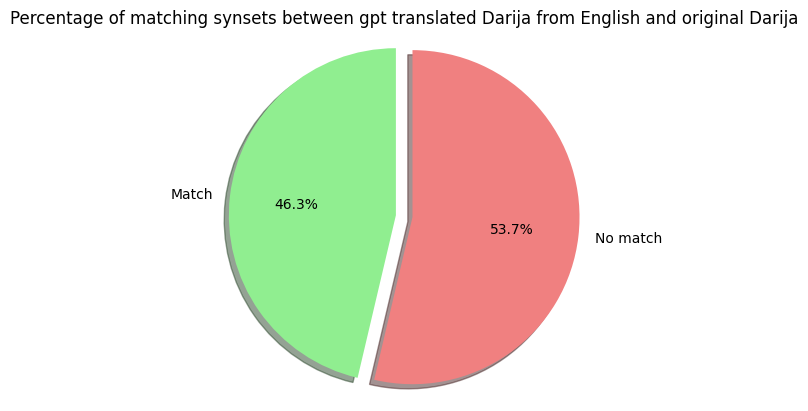

In [2]:
from nltk.corpus import wordnet as wn

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""
    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)

import matplotlib.pyplot as plt

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()